In [2]:
from bs4 import BeautifulSoup as bs
import numpy as np
import json
import re
import pandas as pd
from urllib.request import urlopen 
from urllib.parse import urljoin
import requests
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
## Se pude el codigo html
## Vector que guarda las urls
Urls = []

# string_Datos=
i=1
print("Comenzo a leer las urls")
while True:
    url = requests.get('https://distiller.com/search?page='+str(i)+'&term=bourbon')
    if (url.status_code == 200):
        
        obj_soup = bs(url.text,'html.parser')
        
        Direcciones= obj_soup.find_all('a',href = True)
        
       
        for direccion in Direcciones:

            extension_direccion = direccion['href']
            
            if extension_direccion.startswith('/spirits'):

                clase_direccion = urljoin('https://distiller.com',extension_direccion)
                
                
                Urls.append(clase_direccion)
        i += 1
    else:
        continue
    if(i == 50):
        break
    

print("Termino de leer las urls")


Comenzo a leer las urls
Termino de leer las urls


## WEB SCRAPING
Todos datos fueron guardados en variables tipo string para no tener problemas a la hora de guardar las variables en una matriz normal,
Todos datos fueron obtenido sin hacer modificación alguna, excepto los datos del año, algunos de estos datos estaban en intervalos, por lo cual, se tomo el valor mayor, considerando que su intervalo no era tan grande y la diferencia del promedio era y el valor mayor era pequeña.

In [4]:
texto_dentro = "Name, Type, Cask, Location, Age, ABV %, Price, Badge, # Ratings, Customer' Rating, Flavor Summary, Expert, Expert Score, Smoky, Peaty, Spicy, Herbal, Oily, Full-bodied, Rich, Sweet, Briny, Salty, Vanilla, Tart, Fruity, Floral, Review"

datos_1 = [[]]
datos_1[0].append("Name")
datos_1[0].append("Type")
datos_1[0].append("Cask")
datos_1[0].append("Location")
datos_1[0].append("Age")
datos_1[0].append("ABV %")
datos_1[0].append("Price")
datos_1[0].append("Badge")
datos_1[0].append("# Rating")
datos_1[0].append("Customer' Rating")
datos_1[0].append("Flavor Summary")
datos_1[0].append("Expert")
datos_1[0].append("Expert Score")
datos_1[0].append("Smoky")
datos_1[0].append("Peaty")
datos_1[0].append("Spicy")
datos_1[0].append("Herbal")
datos_1[0].append("Oily")
datos_1[0].append("Full-Bodied")
datos_1[0].append("Rich")
datos_1[0].append("Sweet")
datos_1[0].append("Briny")
datos_1[0].append("Salty")
datos_1[0].append("Vanilla")
datos_1[0].append("Tart")
datos_1[0].append("Fruity")
datos_1[0].append("Floral")
datos_1[0].append("Review")
datos_1.append([])
f=1
for url in range(len(Urls)):
    link = requests.get(Urls[url])
    if (link.status_code == 200):
       
        nombre = ""
        tipo = ""
        cask = ""
        Nombre_Ubicacion = ""
        Age = ""
        abv = ""
        costo = ""
        badge = ""
        cant_Review = ""
        Clasi_Clien = ""
        perfil_sabor = ""
        nombre_Experto = ""
        score = ""
        smoky = ""
        Peaty = ""
        spicy = ""
        Herbal = ""
        Oily = ""
        Full_bodied = ""
        Rich = ""
        Sweet = ""
        Briny = ""
        Salty = ""
        Vanilla = ""
        Tart = ""
        Fruity = ""
        Floral = ""
        review = ""
        #texto html de la pagina
        Texto_html = bs(link.text,'html.parser')
        #encuentra el elemto canvas que que comienza con esto ↓ 
        
        elemento_Canvas = Texto_html.find('canvas', class_='js-flavor-profile-chart')
        
        #obtienes la lista de elementos que con esta ↓ variable, que esta en formato json
        if elemento_Canvas:
        
            
            Datos_Sabores = elemento_Canvas.get('data-flavors')
            
            #Obtienes una lista de las variables antes mencionadas.
            Dictado_Sabores = json.loads(Datos_Sabores)
            if Dictado_Sabores.get('smoky') is not None:
                smoky = str(Dictado_Sabores.get('smoky'))
            else:
                smoky = " "
            if Dictado_Sabores.get('peaty') is not None:

                Peaty = str(Dictado_Sabores.get('peaty'))
                
            else:
                Peaty = " "
            if Dictado_Sabores.get('spicy') is not None:

                spicy = str(Dictado_Sabores.get('spicy'))
            else:
                spicy = " "
            if Dictado_Sabores.get('herbal') is not None:

                Herbal = str(Dictado_Sabores.get('herbal'))
            else:
                Herbal = " "
            if Dictado_Sabores.get('oily') is not None:

                Oily = str(Dictado_Sabores.get('oily'))
            else:
                Oily = " "
            if Dictado_Sabores.get('full_bodied') is not None:

                Full_bodied = str(Dictado_Sabores.get('full_bodied'))
            else:
                Full_bodied = " "
            if Dictado_Sabores.get('rich') is not None:

                Rich = str(Dictado_Sabores.get('rich'))
            else:
                Rich = " "
            if Dictado_Sabores.get('sweet') is not None:

                Sweet = str(Dictado_Sabores.get('sweet'))
            else:
                Sweet = " "
            if Dictado_Sabores.get('briny') is not None:

                Briny = str(Dictado_Sabores.get('briny'))
            else:
                Briny = " "
            if Dictado_Sabores.get('salty') is not None:

                Salty = str(Dictado_Sabores.get('salty'))
            else:
                Salty = " "
            if Dictado_Sabores.get('vanilla') is not None:

                Vanilla = str(Dictado_Sabores.get('vanilla'))
            else:
                Vanilla = " "
            if Dictado_Sabores.get('tart') is not None:

                Tart = str(Dictado_Sabores.get('tart'))
            else:
                Tart = " "
            if Dictado_Sabores.get('fruity') is not None:

              Fruity = str(Dictado_Sabores.get('fruity'))
            else:
                Fruity = " "
            if Dictado_Sabores.get('floral') is not None:

                Floral = str(Dictado_Sabores.get('floral'))
            else:
                Floral = " "
    
        
           
        
        nombre_bool = Texto_html.find('h1', class_='secondary-headline name')
        if nombre_bool is not None:
            nombre = str(nombre_bool.text.strip())
        else:
            nombre_bool = Texto_html.find('h1', class_='secondary-headline name long')
            if nombre_bool is not None:
                nombre_lista= nombre_bool.text.split()
               
                if isinstance(nombre_lista,list):
                    #creo un vecto, lo separo, y lo hago un string grande uwu
                    nombre_vector = ''.join(nombre_lista)
                    partes_nombre = nombre_vector.split()
                    nombre =str(''.join(partes_nombre))
                    
                    
            

        #clasificación cliente
        Ecc= Texto_html.find('div',  class_='rating-display__value average-rating')
        
        if Ecc is not None:

            Clasi_Clien = str(Ecc.find('span', itemprop='ratingValue').text.strip())
        else:
            Clasi_Clien = " "
        #precio
        for i in range(1,6):
            if Texto_html.find('div', class_='spirit-cost cost-'+str(i)):
                costo = str(i)
        #Se busca con la etiqueta li y el primero que tenga ↓ esto
        encontrar_Age = Texto_html.find('li',class_='detail age') 
        age_modificar = encontrar_Age.find('div', class_='value').text.strip()
        
        if age_modificar.lower() == 'nas':
        
            Age = str(age_modificar)
        elif age_modificar is None:
            Age = " "
        else:
            Age_sin_texto = age_modificar.replace('Year','').strip()
            if '-' in Age_sin_texto:
                partes = Age_sin_texto.split('-')
                if len(partes) >=2:
                    
                    age_1=partes[1].replace('years','').strip()
                    Age = str(age_1)
                
            elif Age_sin_texto.isdigit():
                Age = str(Age_sin_texto)
            else:
                Age = " "
           
        #rewie
        encontrar_review = Texto_html.find('span', itemprop='ratingCount')
        if encontrar_review:
            cant_Review = str(encontrar_review.text.strip())
        else:
            cant_Review = " "
        #tipo
        tipo_bool = Texto_html.find('p', class_ = 'ultra-mini-headline type')
        if tipo_bool is not None:
            tipo=tipo_bool.text.strip()
        else:
            tipo = " "
        #ubicación
        Nombre_Ubicacion_bool = Texto_html.find('p', class_ = 'ultra-mini-headline location middleweight')
        if Nombre_Ubicacion_bool is not None:
            Nombre_Ubicacion = str(Nombre_Ubicacion_bool.text.strip())
        else:
            Nombre_Ubicacion = ""
        #Barril
        cask_val_1 = Texto_html.find('li', class_='detail cask-type')

        if cask_val_1 is not None:
            cask_val_2 = cask_val_1.find('div',class_='value')
            if cask_val_2 is not None:
                cask = str(cask_val_2.text.strip())
            else:
                cask =" "
        else:
            cask = " "
        
        #Nombre
        nombre_html = Texto_html.find('div', class_='meet-experts')

        Exper_val = Texto_html.find('div', class_='meet-experts')
        if Exper_val is not None:
            Exper_val_1 = Exper_val.find('a', itemprop='author')
            if Exper_val_1 is not None:
                nombre_Experto = str(Exper_val_1.text.strip())
            else:
                nombre_Experto = " "
        else:
            nombre_Experto =" "   
        score_val = Texto_html.find('div', class_='distiller-score')
        if score_val is not None:
            score = str(score_val.span.text.strip())
        else:
            score = " "

        abv_val = Texto_html.find('li', class_='detail abv')
        if abv_val is not None:
            abv_val_1 =abv_val.find('div', class_='value')
            if abv_val_1 is not None:
                abv = str(abv_val_1.text.strip())
            else:
                abv = " "
        else:
            abv = " "

        perfil_sabor_val =Texto_html.find('div',class_='flavor-profile')
        if perfil_sabor_val is not None:
            perfil_sabor_val_1 =perfil_sabor_val.find('h3',class_='secondary-headline flavors middleweight')
            if perfil_sabor_val_1 is not None:
                perfil_sabor= str(perfil_sabor_val_1.text.strip())
            else:
                perfil_sabor = " "
        else:
            perfil_sabor =" "
        review_val = Texto_html.find('blockquote', itemprop='reviewBody')
        if review_val is not None:
            review = str(review_val.text.strip())
        else:
            review = " "
        badge_val = Texto_html.find('div', class_='spirit-badge')
        if badge_val is not None:
            badge = str(badge_val.text.strip())
        else:
            badge =" "
        
        #texto_dentro = str(nombre) + "," + str(tipo) + "," + str(cask) + "," + str(Nombre_Ubicacion) + "," + str(Age) + "," + str(abv) + "," + str(costo) + "," + str(badge) + "," + str(cant_Review) + "," + str(Clasi_Clien) + "," + str(perfil_sabor) + "," + str(nombre_Experto) + "," + str(score) + "," + str(smoky) + "," + str(Peaty) + "," + str(spicy) + "," + str(Herbal) + "," + str(Oily) + "," + str(Full_bodied) + "," + str(Rich) + "," + str(Sweet) + "," + str(Briny) + "," + str(Salty) + "," + str(Vanilla) + "," + str(Tart) + "," + str(Fruity) + "," + str(Floral) + "," + str(review)   
        datos_1.append([])
        datos_1[f].append(str(nombre))
        datos_1[f].append(str(tipo))
        datos_1[f].append(str(cask))
        datos_1[f].append(str(Nombre_Ubicacion))
        datos_1[f].append(str(Age)) 
        datos_1[f].append(str(abv))
        datos_1[f].append(str(costo))
        datos_1[f].append(str(badge))
        datos_1[f].append(str(cant_Review))
        datos_1[f].append(str(Clasi_Clien))
        datos_1[f].append(str(perfil_sabor))
        datos_1[f].append(str(nombre_Experto))
        datos_1[f].append(str(score))
        datos_1[f].append(str(smoky))
        datos_1[f].append(str(Peaty))
        datos_1[f].append(str(spicy))
        datos_1[f].append(str(Herbal))
        datos_1[f].append(str(Oily))
        datos_1[f].append(str(Full_bodied))
        datos_1[f].append(str(Rich))
        datos_1[f].append(str(Sweet))
        datos_1[f].append(str(Briny))
        datos_1[f].append(str(Salty))
        datos_1[f].append(str(Vanilla))
        datos_1[f].append(str(Tart))
        datos_1[f].append(str(Fruity))
        datos_1[f].append(str(Floral))
        datos_1[f].append(str(review))
        f +=1
                
        
        
print("Fin")

Fin


## Preparación de datos.
observando los datos, de puede deducir que existen muchas variables que pueden afectar el numero de rating de las botellas, en este caso, se inicio, limpiando los datos, eliminando datos en NaN y "", lo que hace esto es disminuir cociderablemente la tabla y al hacer una inspeccion visual de los datos no se logra divisar algun predicor bueno.

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='ABV %', ylabel='Age'>,
        <Axes: xlabel='Price', ylabel='Age'>,
        <Axes: xlabel='# Rating', ylabel='Age'>,
        <Axes: xlabel="Customer' Rating", ylabel='Age'>,
        <Axes: xlabel='Smoky', ylabel='Age'>,
        <Axes: xlabel='Peaty', ylabel='Age'>,
        <Axes: xlabel='Spicy', ylabel='Age'>,
        <Axes: xlabel='Herbal', ylabel='Age'>,
        <Axes: xlabel='Oily', ylabel='Age'>,
        <Axes: xlabel='Full-Bodied', ylabel='Age'>,
        <Axes: xlabel='Rich', ylabel='Age'>,
        <Axes: xlabel='Sweet', ylabel='Age'>,
        <Axes: xlabel='Briny', ylabel='Age'>,
        <Axes: xlabel='Vanilla', ylabel='Age'>,
        <Axes: xlabel='Tart', ylabel='Age'>,
        <Axes: xlabel='Fruity', ylabel='Age'>,
        <Axes: xlabel='Floral', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='ABV %'>,
        <Axes: xlabel='ABV %', ylabel='ABV %'>,
        <Axes: xlabel='Price', ylabel='ABV %'>,
        <

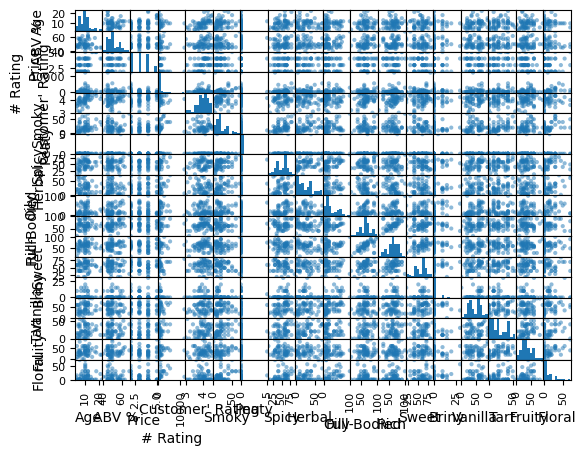

In [23]:
df = pd.DataFrame(datos_1[1:],columns=datos_1[0])

df['Price'] = df["Price"].replace('None', np.nan)

#print(df['Age'].unique)
df['Age'] = df['Age'].replace('None', np.nan)
df['Age'] = df['Age'].replace('NAS', np.nan).replace('nas',np.nan)
df['Age'] = df['Age'].replace(' ', np.nan)
df['Age'] = df['Age'].replace('NaN', np.nan)

df['Smoky'] =df['Smoky'].replace('', np.nan)
df['Peaty'] =df['Peaty'].replace('', np.nan)
df['Spicy'] =df['Spicy'].replace('', np.nan)
df['Herbal'] =df['Herbal'].replace('', np.nan)
df['Oily'] =df['Oily'].replace('', np.nan)
df['Full-Bodied'] =df['Full-Bodied'].replace('', np.nan)
df['Sweet'] =df['Sweet'].replace('', np.nan)
df['Briny'] =df['Briny'].replace('', np.nan)
df['Salty'] =df['Salty'].replace('', np.nan)
df['Vanilla'] =df['Vanilla'].replace('', np.nan)
df['Tart'] =df['Tart'].replace('', np.nan)
df['Fruity'] =df['Fruity'].replace('', np.nan)
df['Floral'] =df['Floral'].replace('', np.nan)
df['Rich'] = df['Rich'].replace('', np.nan)
df['# Rating'] = df['# Rating'].replace(' ', np.nan)


df['# Rating'] = pd.to_numeric(df['# Rating'], errors='coerce', downcast='integer')
df['Price'] = pd.to_numeric(df['Price'])


df.dropna(subset=['Price', '# Rating', "Customer' Rating", 'ABV %'], inplace=True)
df.dropna(subset=['Age', 'Rich','Smoky','Peaty','Spicy','Herbal','Oily','Full-Bodied','Sweet','Briny', 'Vanilla','Tart','Fruity','Floral'], inplace=True)
df['# Rating']= df['# Rating'].astype('float')
df['Price'] = df['Price'].astype('float')
df['Age'] = df['Age'].astype('float')
df['Rich'] = df['Rich'].astype('float')
df["Customer' Rating"] = df["Customer' Rating"].astype('float')
df['Smoky'] = df['Smoky'].astype('float')
df['Peaty'] = df['Peaty'].astype('float')
df['Spicy'] = df['Spicy'].astype('float')
df['Herbal'] = df['Herbal'].astype('float')
df['Oily'] = df['Oily'].astype('float')
df['Full-Bodied'] = df['Full-Bodied'].astype('float')
df['Briny'] = df['Briny'].astype('float')
df['Vanilla'] = df['Vanilla'].astype('float')
df['Tart'] = df['Tart'].astype('float')
df['Fruity'] = df['Fruity'].astype('float')
df['Floral'] = df['Floral'].astype('float')
df['ABV %'] = df['ABV %'].astype('float')
df['Sweet'] = df['Sweet'].astype('float')

pd.plotting.scatter_matrix(df) 



Pero con el .OLS y ocupando el apartado de P>|t|, se puede observar el que valor más pequeño es el del precio, por lo cual este sera el valor a concidera para el proceso de regresión lineal.

In [24]:
x = sm.add_constant(df[['Price','Age',"Customer' Rating",'ABV %', 'Rich','Smoky','Peaty','Spicy','Herbal','Oily','Full-Bodied','Sweet','Briny', 'Vanilla','Tart','Fruity','Floral']])
modelo_ols_1 = sm.OLS(df['# Rating'],x ).fit()
modelo_ols_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               # Rating   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1.585
Date:                Fri, 05 Apr 2024   Prob (F-statistic):              0.110
Time:                        16:38:30   Log-Likelihood:                -537.11
No. Observations:                  62   AIC:                             1110.
Df Residuals:                      44   BIC:                             1149.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2341.0135   3185.485     -0.735      0.466   -8760.937    4078.910
Price             -749.8644    289.162     -2.593      0.013   -1332.633    -167.096
Age                 52.1821     82.957      0.629      0.533    -115.006     219.370
Customer' Rating  1125.7807    913.582      1.232      0.224    -715.424    2966.985
ABV %              -32.2175     51.998     -0.620      0.539    -137.012      72.577
Rich               -19.3964     19.744     -0.982      0.331     -59.189      20.396
Smoky                9.6400     24.089      0.400      0.691     -38.907      58.187
Peaty               -4.7108    373.162     -0.013      0.990    -756.769     747.347
Spicy                6.2964     19.367      0.325      0.747     -32.735      45.328
Herbal               4.2390     14.753      0.287      0.775     -25.494      33.972
Oily                -1.9815     15.755     -0.126      0.900     -33.733      29.770
Full-Bodied         36.0611     22.442      1.607      0.115      -9.168      81.290
Sweet               31.1928     18.607      1.676      0.101      -6.307      68.693
Briny              -35.0818     48.367     -0.725      0.472    -132.558      62.394
Vanilla            -17.4306     13.725     -1.270      0.211     -45.091      10.229
Tart               -28.0898     21.457     -1.309      0.197     -71.334      15.155
Fruity              -3.0809     15.212     -0.203      0.840     -33.739      27.577
Floral              34.1830     18.899      1.809      0.077      -3.906      72.272
==============================================================================
Omnibus:                       78.612   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1077.358
Skew:                           3.480   Prob(JB):                    1.13e-234
Kurtosis:                      22.199   Cond. No.                     2.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Preparación de datos.
Ya sabiendo que datos se pueden ocupar para la regreción lineal se pueden preparar las variables para ser entrenadas.

In [31]:
df_2 = pd.DataFrame(datos_1[1:],columns=datos_1[0])
df_2['Price'] = df_2["Price"].replace('None', np.nan)
df_2['# Rating'] = df_2['# Rating'].replace(' ', np.nan)

df_2['# Rating'] = pd.to_numeric(df_2['# Rating'], errors='coerce', downcast='integer')
df_2['Price'] = pd.to_numeric(df_2['Price'])
df_2.dropna(subset=['Price','# Rating'], inplace=True)
df_2['# Rating'] = df_2['# Rating'].astype('float')
df_2['Price'] = df_2['Price'].astype('float')


array([1.2938e+04, 1.1815e+04, 9.4720e+03, 8.4520e+03, 8.9920e+03,
       7.7760e+03, 7.1680e+03, 6.6290e+03, 7.2410e+03, 6.4490e+03,
       6.4240e+03, 1.0000e+00, 2.7000e+01, 5.3390e+03, 5.0630e+03,
       4.8280e+03, 1.6000e+01, 9.0000e+00, 2.6000e+01, 5.0000e+00,
       3.0000e+00, 2.0000e+00, 5.6200e+03, 4.4340e+03, 3.6940e+03,
       3.8080e+03, 4.8680e+03, 3.8910e+03, 2.1740e+03, 3.2250e+03,
       3.2360e+03, 2.8350e+03, 4.4380e+03, 3.3050e+03, 2.8310e+03,
       4.5900e+02, 2.3640e+03, 5.2000e+01, 1.3700e+02, 2.8000e+02,
       2.0090e+03, 1.8000e+01, 1.7380e+03, 2.6790e+03, 1.7370e+03,
       1.2100e+02, 9.0000e+01, 1.6240e+03, 2.4060e+03, 4.1000e+01,
       3.3000e+01, 1.6920e+03, 2.2800e+03, 6.3000e+01, 4.5000e+01,
       1.8030e+03, 1.3680e+03, 1.4950e+03, 3.0410e+03, 1.8530e+03,
       1.3880e+03, 2.4800e+02, 2.0270e+03, 1.1700e+02, 2.0600e+02,
       8.0000e+00, 1.0100e+02, 1.2670e+03, 7.0000e+00, 6.0000e+00,
       1.2000e+01, 4.0000e+00, 1.1330e+03, 2.0680e+03, 1.1920e

Se definen las variables a ocupar.

In [36]:
val_x = df_2['# Rating'].to_frame()
val_y = df_2[['Price']]


Se entrenan las variables.

In [37]:
x_Train, x_Test, y_Train, y_Test = train_test_split(val_x,val_y,test_size=0.8)


In [38]:
modelo = LinearRegression()
modelo.fit(x_Train, y_Train)

y_predic_test = modelo.predict(x_Test)

In [39]:
mse = mean_squared_error(y_Test, y_predic_test)

r2 = r2_score(y_Test, y_predic_test)

print(f'El valor del mse es:{mse} y el valor del r^2 es de: {r2}')

El valor del mse es:1.2241009690945324 y el valor del r^2 es de: 0.03298418942449932
